In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "modern"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipList = ['/decklist/modern-challenge-32-2025-08-3112812792', '/decklist/modern-challenge-64-2025-08-3012812786']

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["date"] >= startDate
        if x["url"] not in skipList
    ]

    print(urlList)

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

['/decklist/modern-challenge-32-2025-08-3112812796', '/decklist/modern-gold-league-2025-08-319511', '/decklist/modern-league-2025-08-319527', '/decklist/modern-challenge-32-2025-08-3012812781', '/decklist/modern-challenge-32-2025-08-3012812779', '/decklist/modern-gold-league-2025-08-309511', '/decklist/modern-league-2025-08-309527', '/decklist/modern-challenge-64-2025-08-2912812771', '/decklist/modern-gold-league-2025-08-299511', '/decklist/modern-league-2025-08-299527', '/decklist/modern-challenge-64-2025-08-2812812753', '/decklist/modern-gold-league-2025-08-289511', '/decklist/modern-league-2025-08-289527', '/decklist/modern-challenge-64-2025-08-2712812743', '/decklist/modern-gold-league-2025-08-279511', '/decklist/modern-league-2025-08-279527', '/decklist/modern-challenge-32-2025-08-2612812733', '/decklist/modern-gold-league-2025-08-269511', '/decklist/modern-league-2025-08-269527', '/decklist/modern-challenge-32-2025-08-2512812843', '/decklist/modern-challenge-32-2025-08-2512812187

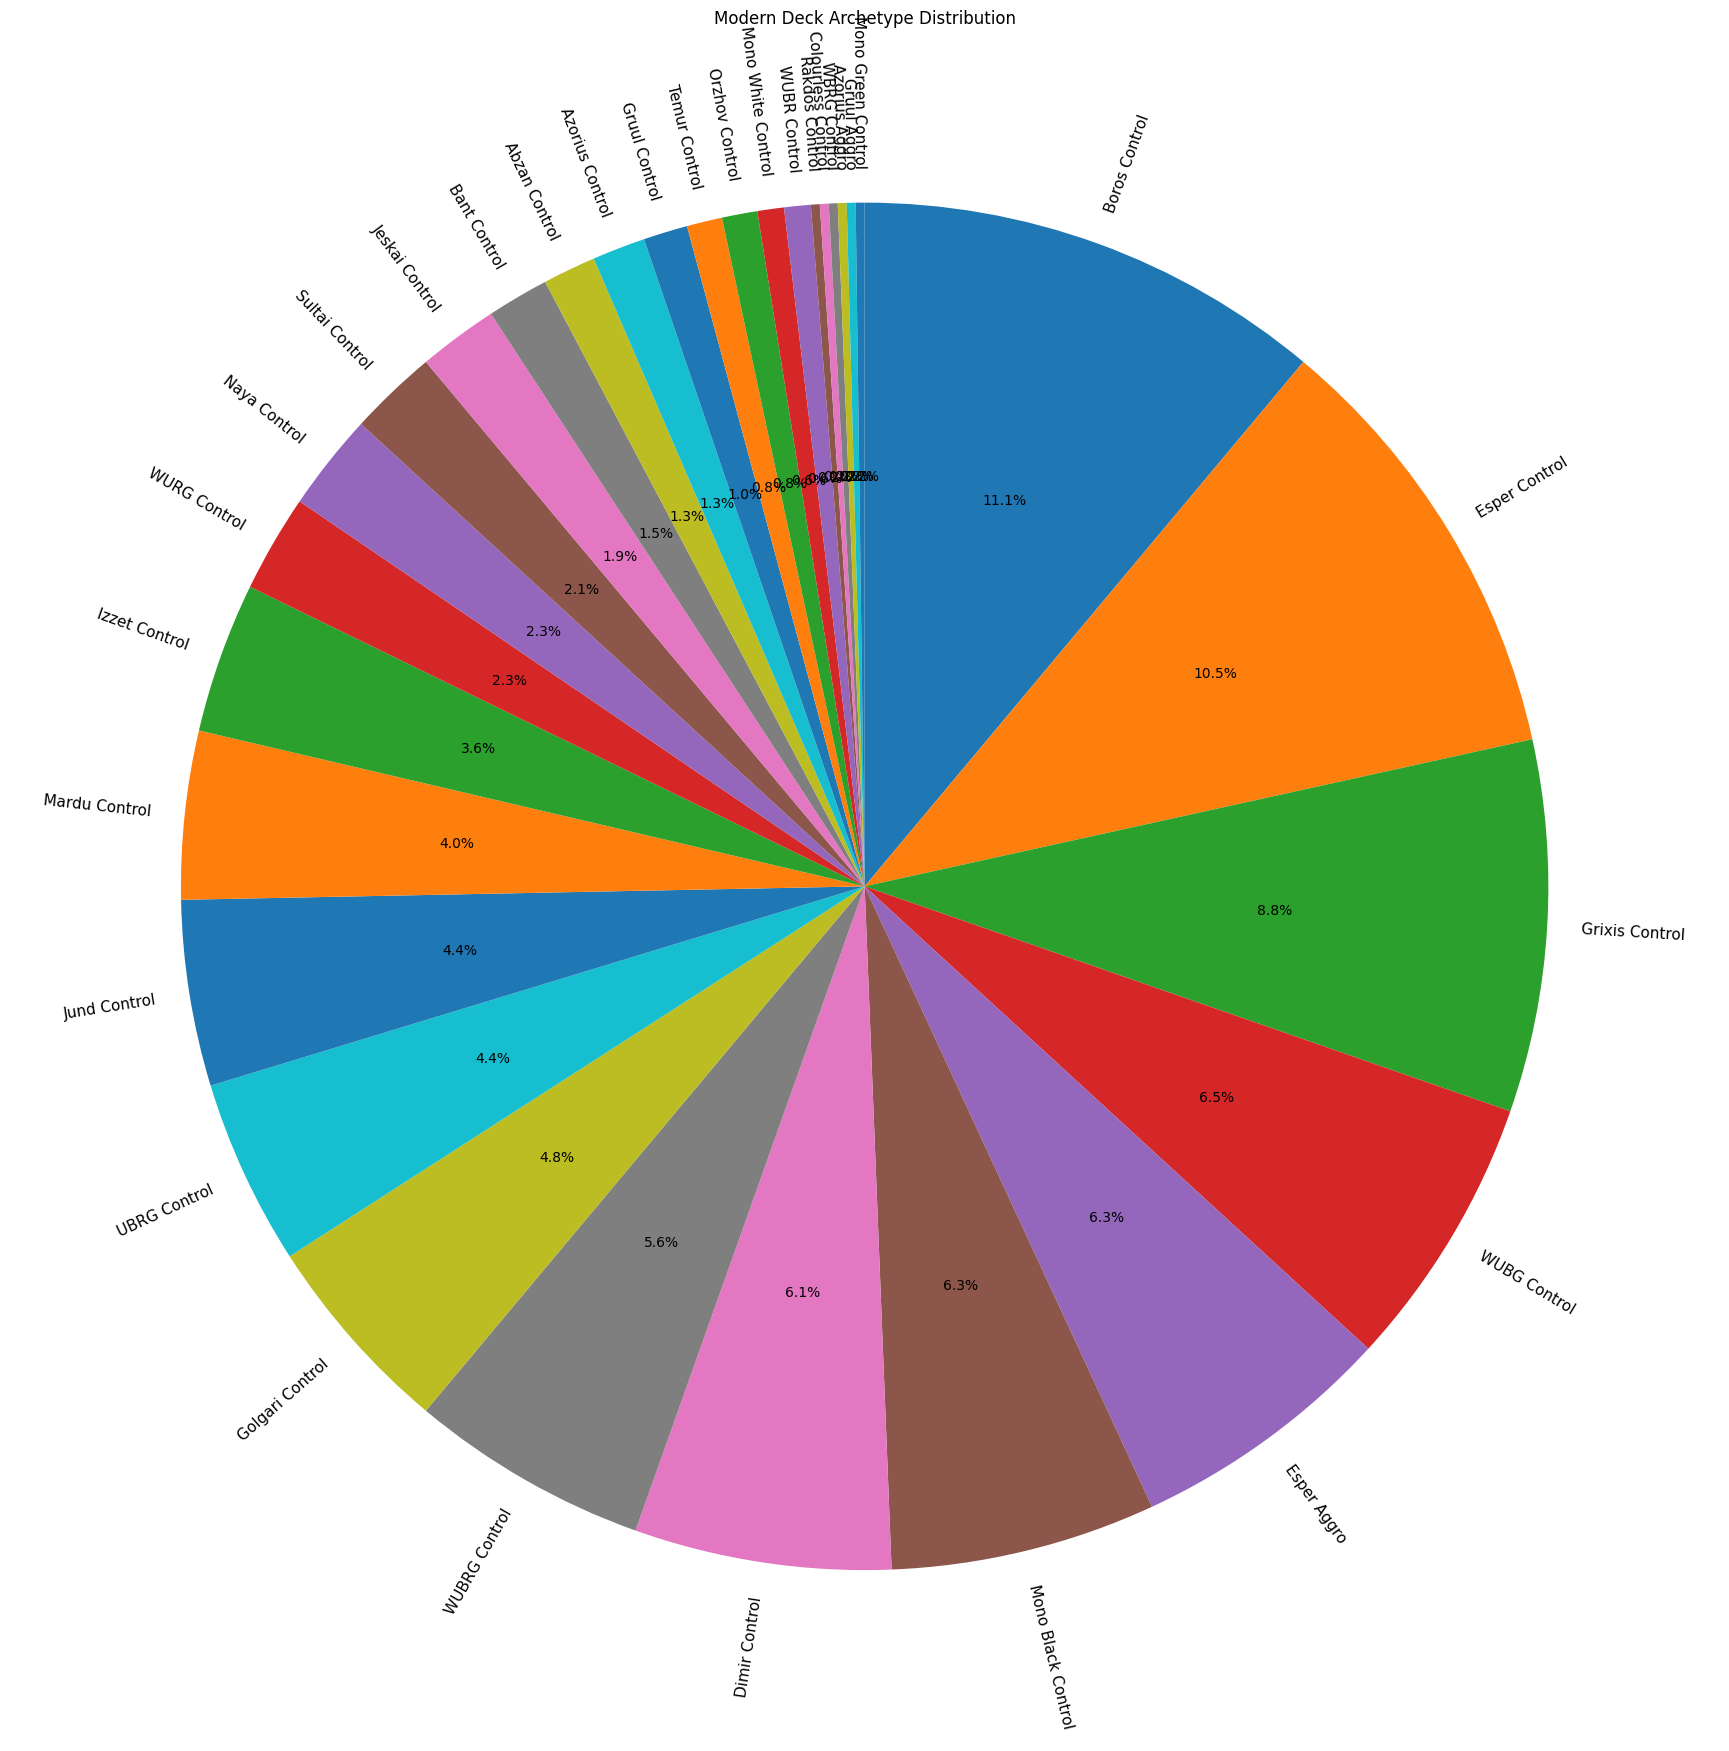

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

478 deck(s) without any of the specified key cards
Izzet Control


Main/Side  \
Deck URL                                         Deck               
/decklist/modern-challenge-32-2025-08-2512812187 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   
                                                 Deck 0      Side   

                                                                     Card Name  \
Deck URL                                         Deck                            
/decklist/modern-challenge-32-2025-08-2512812187 Deck 0        Kappa Cannoneer   
                                                 Deck 0        Kappa Cannoneer   
                                                 Deck 0                Memnite   
                                                 Deck 0                Memnite   
                                                 Deck 0      Pinnacle Emissary   
                                                 Deck 0      Pinnacle Emissary   
                                                 Deck 0        Metallic Rebuke   
                                                 Deck 0        Metallic Rebuke   
                                                 Deck 0        Mishra's Bauble   
                                                 Deck 0        Mishra's Bauble   
                                   

In [4]:
includedCardList = []
excludedCardList = []
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Flooded Strand              2.58
Marsh Flats                 2.25
Arid Mesa                   1.97
Polluted Delta              1.70
Fatal Push                  1.54
                            ... 
Ultima                      0.00
Freestrider Lookout         0.00
Urborg, Tomb of Yawgmoth    0.00
Eternal Witness             0.00
Vindicate                   0.00
Name: Quantity, Length: 608, dtype: float64

In [5]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Flooded Strand              1234
Marsh Flats                 1074
Arid Mesa                    944
Polluted Delta               812
Fatal Push                   736
                            ... 
Ultima                         2
Freestrider Lookout            2
Urborg, Tomb of Yawgmoth       2
Eternal Witness                2
Vindicate                      2
Name: Quantity, Length: 608, dtype: int64